In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Install Miniconda3
!pip install -q condacolab
import condacolab
condacolab.install_miniconda(prefix='/usr/local')
print('The Miniconda has been installed...')

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py310_23.11.0-2-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...
The Miniconda has been installed...


In [1]:
import os
os.chdir("/kaggle/working/")
CODE_DIR = "InvSR"
print("Done...")

Done...


In [2]:
# Clone Repository
import shutil
from pathlib import Path
if Path(CODE_DIR).exists():
  shutil.rmtree(CODE_DIR)

!git clone https://github.com/zsyOAOA/InvSR.git $CODE_DIR
os.chdir(f"./{CODE_DIR}")
print("Done...")

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into 'InvSR'...
remote: Enumerating objects: 1017, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 1017 (delta 26), reused 38 (delta 15), pack-reused 963 (from 2)
Receiving objects: 100% (1017/1017), 56.16 MiB | 54.72 MiB/s, done.
Resolving deltas: 100% (293/293), done.
Done...


In [3]:
"""
Managing environments Anaconda:
https://docs.conda.io/projects/conda/en/4.6.0/user-guide/tasks/manage-environments.html
"""
# Viewing the list of your environments
!conda info --envs
# Updating the environment.
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu121
!pip install -U xformers==0.0.27.post2 --index-url https://download.pytorch.org/whl/cu121
!pip install -e ".[torch]"
!pip install -r requirements.txt
print("The environemnt has beed updated...")

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
# conda environments:
#
base                     /usr/local

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.1/799.1 MB 1.8 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 18.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 82.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 99.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.4 MB/s eta 0:00:00:00:01

In [4]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Zoomed LR', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('InvSR', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  if img.ndim > 3:
    img = img[:, :, :3]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
Setting timesteps for inference: [200]
Downloading: "https://huggingface.co/OAOA/InvSR/resolve/main/noise_predictor_sd_turbo_v5.pth" to /kaggle/working/InvSR/weights/noise_predictor_sd_turbo_v5.pth

100%|████████████████████████████████████████| 129M/129M [00:03<00:00, 42.3MB/s]
Fetching 12 files:  17%|████▏                    | 2/12 [00:00<00:01,  9.61it/s]
unet/config.json: 100%|████████████████████| 1.87k/1.87k [00:00<00:00, 7.50MB/s]

tokenizer/special_tokens_map.json: 100%|███████| 574/574 [00:00<00:00, 4.68MB/s]

tokenizer/vocab.json:   0%|                         | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json: 100%|██████

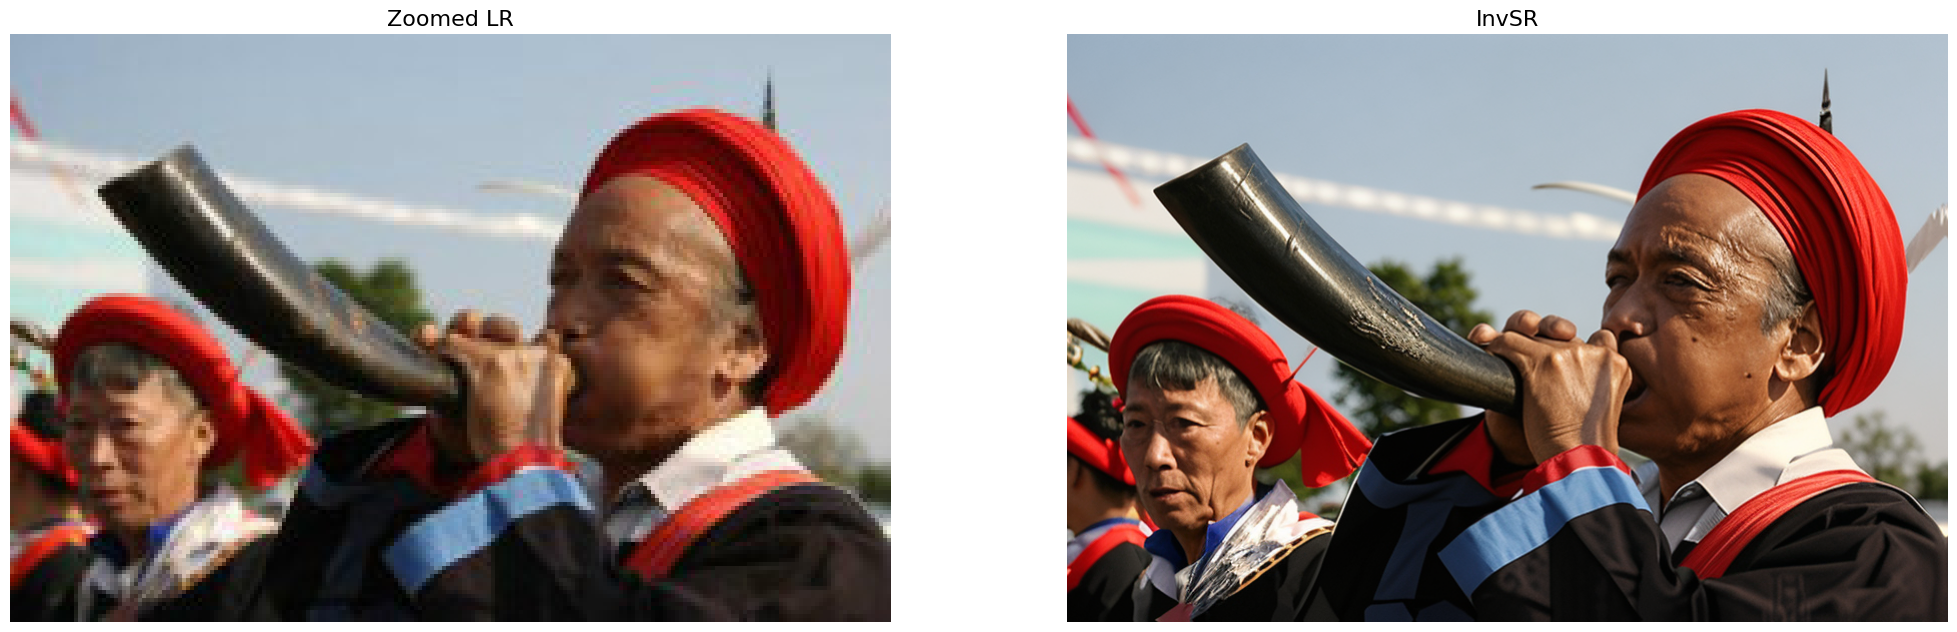

In [5]:
#  Real-World Image super-resolution with one steps
!python inference_invsr.py -i testdata/RealSet80/29.jpg -o outputs/RealSet80_one --num_steps 1 --chopping_size 128

im_lq = imread("testdata/RealSet80/29.jpg")
im_hq = imread("outputs/RealSet80_one/29.png")
display(im_lq, im_hq)